# Importing libraries

In [1]:
 import numpy as np 
# visualization
import seaborn as sns 
# metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import sequence
plt.style.use('ggplot')
# visualizations
from tensorflow.keras.models import Model
import pandas as pd 
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer 
import re
import string
# tensorflow layers
from tensorflow.keras.layers import LSTM, Input, Embedding,Activation, Bidirectional, Dense, Dropout
# tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
import nltk
# nltk.download('wordnet')
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
import warnings
# preprocessing libraries
import nltk
from nltk.corpus import stopwords
warnings.filterwarnings("ignore")

In [4]:
from tensorflow.keras.optimizers import RMSprop
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
# wordcloud
from wordcloud import WordCloud

In [5]:
# importing the data
data = pd.read_csv('Suicide_Detection.csv')

In [6]:
# data exploration
data.tail()

,Unnamed: 0,text,class
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide
232073,348110,I still haven't beaten the first boss in Hollo...,non-suicide


In [7]:
# column names
data.columns

Index(['Unnamed: 0', 'text', 'class'], dtype='object')

In [8]:
# selecting the columns requred for analysis
data = data[['text','class']]

In [9]:
data.tail()

,text,class
232069,If you don't like rock then your not going to ...,non-suicide
232070,You how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,The usual stuff you find hereI'm not posting t...,suicide
232073,I still haven't beaten the first boss in Hollo...,non-suicide


# Data Visualization

# Histogram
import seaborn as sns
from seaborn import histplot
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
sns.histplot(data['class'], kde=True, color='black', stat='density')
plt.show()

Text(0.5, 1.0, 'Plot')

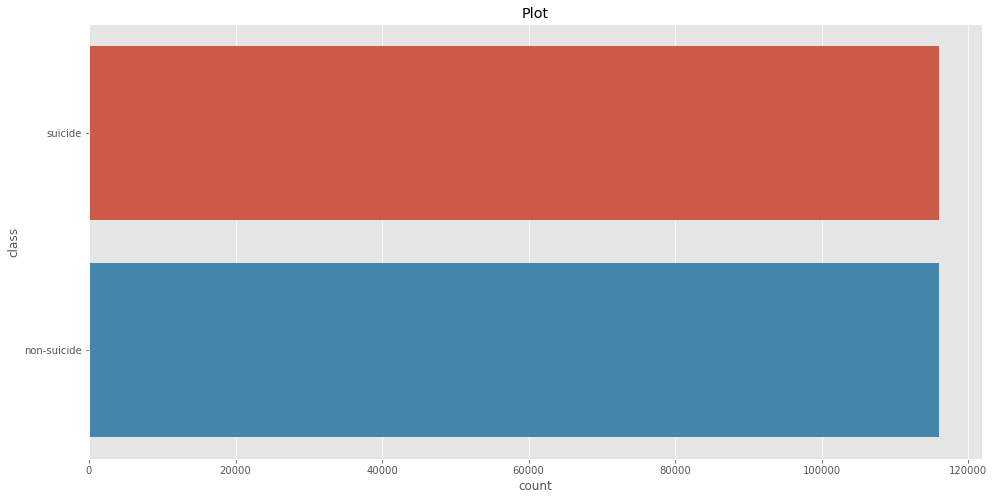

In [10]:
# countplot showing the output binary labels
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(y ='class', data = data, ax=ax)
ax.set_title("Plot")

# Data Preprocessing 

In [11]:
# data preprocessing inspired and referenced from: https://github.com/KevinYobeth/Python-TextEmotionDetection

# importing label encoder A neural network expects numerical data.
# Thus, to fit and evaluate a model, categorical data must be converted to numbers.
from sklearn.preprocessing import LabelEncoder
MY_LB = LabelEncoder()
# encoding the output values
data['class'] = MY_LB.fit_transform(data[['class']].values)

In [12]:
# output column after encoding 
data.tail()

,text,class
232069,If you don't like rock then your not going to ...,0
232070,You how you can tell i have so many friends an...,0
232071,pee probably tastes like salty tea😏💦‼️ can som...,0
232072,The usual stuff you find hereI'm not posting t...,1
232073,I still haven't beaten the first boss in Hollo...,0


In [13]:
# sampling the data by a fraction of 20%
data = data.sample(frac=.08, random_state=14)

In [14]:
# Stop words are terms that are normally filtered out before processing natural language.
# The most prevalent words in any language are stop words
stop_words = set(stopwords.words('english'))
def clean_stopwords(text):
    return " ".join([name for name in str(text).split() if name not in stop_words])
# fitting the data to the function
data['text'] = data['text'].apply(lambda x: clean_stopwords(x))
data['text'].tail()

14686     I even want die anymore.Clickbait-ish title oh...
222257    Advice confidence?I’m 16 year old female I’ve ...
6         [Trigger warning] Excuse self inflicted burns*...
96612     yeah mom loves you... many bitches got subway ...
187548    Please help Me girlfriend different time zones...
Name: text, dtype: object

In [15]:
# punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
# removing punctuations from the data
#punctuation does not carry meaningful information and is removed from all the datasets. 
eng_punct = string.punctuation
# funtion to remove punctuations
def punctuation_clean(text):
    out = str.maketrans('', '', eng_punct)
    return text.translate(out)

In [17]:
# fitting 
data['text'] = data['text'].apply(lambda x: punctuation_clean(x))
data['text'].head()

163961    Shoutout homie gave nword pass camping trip ye...
74942                    fuck lifeim fucking disappointment
160991    Online School sucks I hate much boring I would...
72400     I something kinda mean I saw post 6000 upotes ...
195610    I cant believe it So short time I liked girl p...
Name: text, dtype: object

In [18]:
# excluding the special characters
def clean_character(text):
    return re.sub(r'(.)\1+', r'\1',text)
# fitting data to the function
data['text'] = data['text'].apply(lambda x: clean_character(x))
data['text'].head()

163961    Shoutout homie gave nword pas camping trip yea...
74942                     fuck lifeim fucking disapointment
160991    Online Schol sucks I hate much boring I would ...
72400     I something kinda mean I saw post 60 upotes th...
195610    I cant believe it So short time I liked girl p...
Name: text, dtype: object

In [19]:
# Removing the email data such as @symbols
def clean_email(text):
    return re.sub('@[^\s]+','',text)
# fitting the function to the dataset
data['text'] = data['text'].apply(lambda x: clean_email(x))
data['text'].tail()

14686     I even want die anymoreClickbaitish title oh w...
222257    Advice confidenceI’m 16 year old female I’ve a...
6         Triger warning Excuse self inflicted burnsI kn...
96612     yeah mom loves you many bitches got subway sur...
187548    Please help Me girlfriend diferent time zones ...
Name: text, dtype: object

In [20]:
# cleaning the urls from the data
def clean_weburl(text):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',text)
# fitting clean url function
data['text'] = data['text'].apply(lambda x: clean_weburl(x))
data['text'].tail()

14686     I even want die anymoreClickbaitish title oh w...
222257    Advice confidenceI’m 16 year old female I’ve a...
6         Triger warning Excuse self inflicted burnsI kn...
96612     yeah mom loves you many bitches got subway sur...
187548    Please help Me girlfriend diferent time zones ...
Name: text, dtype: object

In [21]:
#removing numerical data fromthe text data
#Numbers are removed because they do not add much information to text processing.
def clean_numbers(text):
    return re.sub('[0-9]+', '',text)
#fit clean_numbers function on data
data['text'] = data['text'].apply(lambda x: clean_numbers(x))
data['text'].head()

163961    Shoutout homie gave nword pas camping trip yea...
74942                     fuck lifeim fucking disapointment
160991    Online Schol sucks I hate much boring I would ...
72400     I something kinda mean I saw post  upotes thou...
195610    I cant believe it So short time I liked girl p...
Name: text, dtype: object

In [22]:
# RegexpTokenizer uses a regular expression to split a string.
#Tokenisation is the process of converting the raw text into small tokens such as characters or words. These tokens aid in comprehending the context by preparing a vocabulary and in constructing the NLP models. 
tokenize_data = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenize_data.tokenize)

In [23]:
data.tail()

,text,class
14686,"[I, even, want, die, anymoreClickbaitish, titl...",1
222257,"[Advice, confidenceI, m, year, old, female, I,...",1
6,"[Triger, warning, Excuse, self, inflicted, bur...",1
96612,"[yeah, mom, loves, you, many, bitches, got, su...",0
187548,"[Please, help, Me, girlfriend, diferent, time,...",0


In [24]:
# Stemming is a method of removing affixes from words. A technique for reducing a term to its stem or root form. It is often used in content extraction tasks to improve recall and provide the most relevant results.
stemming = nltk.PorterStemmer()
def stemming_data(data):
    out = [stemming.stem(word) for word in data]
    return out
# fitting the stemming function on text data
data['text'] = data['text'].apply(lambda x: stemming_data(x))
data['text'].head()

163961    [shoutout, homi, gave, nword, pa, camp, trip, ...
74942                       [fuck, lifeim, fuck, disapoint]
160991    [onlin, schol, suck, I, hate, much, bore, I, w...
72400     [I, someth, kinda, mean, I, saw, post, upot, t...
195610    [I, cant, believ, it, So, short, time, I, like...
Name: text, dtype: object

In [25]:
# lemmatization
# The procedure of merging a word's inflected forms into a single item is known as lemmatization.
# It is analogous to searching for a transformation to apply to a word to get its normalised version. This normalised form is the dictionary or canonical form and is known as the lemma in the lemmatisation process. the words context. As a result, it connects words with similar meanings into a single term.
Lemmatizer = nltk.WordNetLemmatizer()
def lemmatization(data):
    text = [Lemmatizer.lemmatize(word) for word in data]
    return text
# fitting data 
data['text'] = data['text'].apply(lambda x: lemmatization(x))
data['text'].head()

163961    [shoutout, homi, gave, nword, pa, camp, trip, ...
74942                       [fuck, lifeim, fuck, disapoint]
160991    [onlin, schol, suck, I, hate, much, bore, I, w...
72400     [I, someth, kinda, mean, I, saw, post, upot, t...
195610    [I, cant, believ, it, So, short, time, I, like...
Name: text, dtype: object

In [26]:
# input data
X = data.text
X.head()

163961    [shoutout, homi, gave, nword, pa, camp, trip, ...
74942                       [fuck, lifeim, fuck, disapoint]
160991    [onlin, schol, suck, I, hate, much, bore, I, w...
72400     [I, someth, kinda, mean, I, saw, post, upot, t...
195610    [I, cant, believ, it, So, short, time, I, like...
Name: text, dtype: object

In [27]:
# output data
y = data['class']
y.head()

163961    0
74942     1
160991    0
72400     0
195610    0
Name: class, dtype: int32

In [28]:
# input layer numbers
text_max = 500
# tokens are grouping of characters in a document that can be processed as a unit
tkn = Tokenizer(num_words=2000)
tkn.fit_on_texts(X)
# object for tokens
sequence_s = tkn.texts_to_sequences(X)
matrix_seq = sequence.pad_sequences(sequence_s,maxlen=text_max)

## Word Cloud

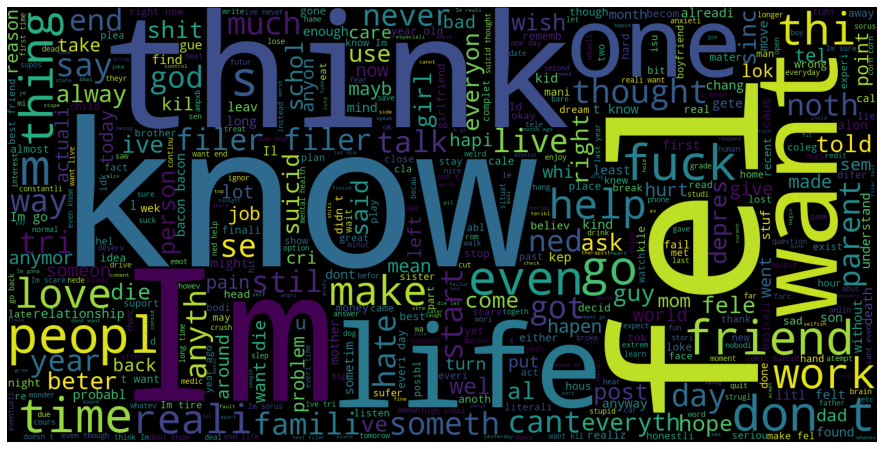

In [29]:
# A word cloud is a collection of words that form a cloud. A word's size reveals its importance.
word_cloud=[]
for val in data['text']:
    for i in val:
        word_cloud.append(i)
words=" ".join(word_cloud) 
# wordcloud
cloud = WordCloud(background_color='black', width=1600,                            
                      height=800, max_words=500).generate(words)
fig, ax = plt.subplots(figsize=(16,8)) 
# plot
ax.imshow(cloud, interpolation='bilinear')       
ax.set_axis_off()
plt.imshow(cloud)

In [30]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(matrix_seq, y, test_size=0.2, random_state=2)

In [31]:
len(X_test)

3714

# LSTM Model building 

In [54]:
# writing a tensorflow_model function for training model overdata
# Long short-term memory is an artificial recurrent neural network architecture used in the field of deep learning.
# Unlike standard feedforward neural networks, LSTM has feedback connections.
def tensorflow_model(): 
#     input layer
    my_in = Input(name='inputs',shape=[text_max])
    tensor_model = Embedding(2000,50,input_length=text_max)(my_in) 
    tensor_model = LSTM(64)(tensor_model) 
#     hidden layer
    tensor_model = Dense(256)(tensor_model) 
    tensor_model = Activation('relu')(tensor_model) 
    tensor_model = Dropout(0.5)(tensor_model) 
#     output layer has only one neuron as it is a binary classification: suicide or not suicide
    tensor_model = Dense(1,name='out_layer')(tensor_model) 
#     activation function used is sigmoid which gives only one output as this is a binary classification
    tensor_model = Activation('sigmoid')(tensor_model)
#   model is developed
    model = Model(inputs=my_in,outputs=tensor_model) 
    return model 

In [55]:
# creating object for the model
model = tensorflow_model()
# configuring the LSTM model for training the bunary classication task
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

# Imports libraries
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

In [57]:
# training the model with data
LSTM_model=model.fit(X_train,Y_train,batch_size=32,epochs=15, validation_split=0.2)

Epoch 1/5
372/372 [==============================] - 71s 192ms/step - loss: 0.2381 - accuracy: 0.9135 - val_loss: 0.2309 - val_accuracy: 0.9115
Epoch 2/5
372/372 [==============================] - 67s 179ms/step - loss: 0.2055 - accuracy: 0.9250 - val_loss: 0.2224 - val_accuracy: 0.9111
Epoch 3/5
372/372 [==============================] - 71s 191ms/step - loss: 0.1895 - accuracy: 0.9327 - val_loss: 0.2291 - val_accuracy: 0.9159
Epoch 4/5
372/372 [==============================] - 80s 215ms/step - loss: 0.1762 - accuracy: 0.9400 - val_loss: 0.2253 - val_accuracy: 0.9145
Epoch 5/5
372/372 [==============================] - 80s 215ms/step - loss: 0.1691 - accuracy: 0.9405 - val_loss: 0.2281 - val_accuracy: 0.9192


In [58]:
#getting predictions on the trained model
y_pred = model.predict(X_test) 
# converting predicted values to true and false
y_pred = (y_pred > 0.5)

In [59]:
# auc roc score for model classification
from sklearn.metrics import accuracy_score,f1_score
tn, fp, fn, tp = confusion_matrix(Y_test,y_pred).ravel()
# false positive rate
False_Positive_Rate = fp / (fp + tn)
# false negative rate
false_negative_rate = fn / (tp + fn)
# true negative rate
True_Negative_Rate = tn / (tn + fp)
Negative_Predictive_Value = tn/ (tn + fn)
false_discovery_rate = fp/ (tp + fp)
# true positive rate
true_positive_rate = tp / (tp + fn)
positive_predictive_value = tp/ (tp + fp)
# accuracy value of the model
accuracy = (tp + tn) / (tp + fp + fn + tn)
# f1 macro and f1 micro
f1macro = f1_score(Y_test, y_pred, average='macro')
f1micro = f1_score(Y_test, y_pred, average='micro')
f1weighted = f1_score(Y_test, y_pred, average='weighted')
# importing cohen score and matthews correlation for evaluation
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef
kappa = cohen_kappa_score(Y_test,y_pred)
mcc = matthews_corrcoef(Y_test,y_pred) 
# printing the metrics
print('False Positive Rate: ',False_Positive_Rate)
print('FNR: ',false_negative_rate)
print('True Negative Rate: ',True_Negative_Rate)
print('Negative Pred Val: ',Negative_Predictive_Value)
print('FDR: ',false_discovery_rate)
print('TPR or Recall score: ',true_positive_rate)
print('precision score: ',positive_predictive_value)
print('accuracy: ',accuracy)
print('f1 mac % d '% f1macro)
print('kappa', kappa)
print('mcc: ', mcc)

# Other metrics for evaluation
from sklearn.metrics import average_precision_score
print('avg precison:',average_precision_score(Y_test,y_pred))

from sklearn.metrics import log_loss
print('log loss: ',log_loss(Y_test,y_pred))

from sklearn.metrics import brier_score_loss
print('brier loss: ',brier_score_loss(Y_test,y_pred))



False Positive Rate:  0.05591748099891422
FNR:  0.11324786324786325
True Negative Rate:  0.9440825190010858
Negative Pred Val:  0.8913377754997437
FDR:  0.058423142370958595
TPR or Recall score:  0.8867521367521367
precision score:  0.9415768576290414
accuracy:  0.9151857835218093
f1 mac  0 
kappa 0.8304408962801089
mcc:  0.8318739943569433
avg precison: 0.8920266043661416
log loss:  2.9294014332073717
brier loss:  0.08481421647819062


In [60]:
#starting model evaluation here 
acc = model.evaluate(X_test,Y_test) 

117/117 [==============================] - 5s 44ms/step - loss: 0.2476 - accuracy: 0.9152


In [61]:
print('Test Accuracy: {:0.2f}'.format(acc[1]))

Test Accuracy: 0.92


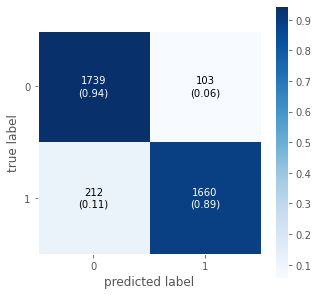

In [62]:
ConfMatr = confusion_matrix(Y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=ConfMatr, figsize=(5,5), show_absolute=True, show_normed=True, colorbar=True)
plt.show()

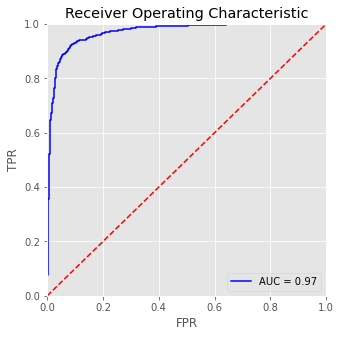

In [63]:
# roc plot function
#referenced form stackoverflow
from sklearn import metrics
def plot_roc(X_test, Y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    fpr, tpr, threshold = metrics.roc_curve(Y_test, model.predict_on_batch(X_test))
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize = (5,5))
    plt.title('Receiver Operating Characteristic')
#     plot to show false positive rate vs true positive rate
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
#     setting limits for the plot
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()
plot_roc(X_test,Y_test)

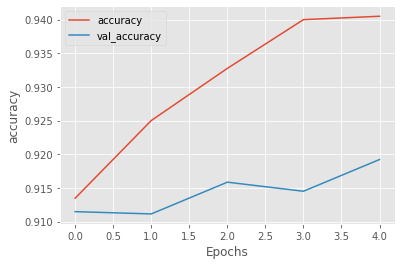

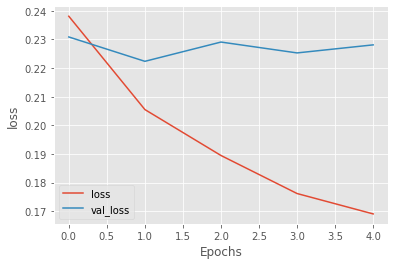

In [64]:
#referenced from stack overflow
def acc_epoch(model, val):
#     plotting the model history
    plt.plot(model.history[val])
    plt.plot(model.history['val_'+val])
    plt.xlabel("Epochs")
    plt.ylabel(val)
    plt.legend([val, 'val_'+val])
    plt.show()
#accuracy vs val_accuracy 
acc_epoch(LSTM_model, "accuracy")
acc_epoch(LSTM_model, "loss")

In [65]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(Y_test, y_pred)

0.8318739943569433

# Bidirectional LSTM Model 

In [66]:
# bidirectional LSTM model using tensorflow
def bidirectional_model(): 
#     input layer
    my_in = Input(name='inputs',shape=[text_max])
    LSTM_model = Embedding(2000,50,input_length=text_max)(my_in) #step2
    LSTM_model = Bidirectional(LSTM(64))(LSTM_model)
#     hidden layer
    LSTM_model = Dense(256)(LSTM_model) 
#     rectified linear unit
    LSTM_model = Activation('relu')(LSTM_model) 
#     adding a dropout layer to regularize
    LSTM_model = Dropout(0.5)(LSTM_model) 
#     output layer has only one neuron as it is a binary classification: suicide or not suicide
    LSTM_model = Dense(1,name='out_layer')(LSTM_model) 
#     activation function used is sigmoid which gives only one output as this is a binary classification
    LSTM_model = Activation('sigmoid')(LSTM_model)
#     returning the final model
    model = Model(inputs=my_in,outputs=LSTM_model)
    return model 

In [67]:
# creating object for model and compiling
model = bidirectional_model() 
# Configuring the model
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [68]:
# fitting the model with the data
BiLSTM_model=model.fit(X_train,Y_train,batch_size=32,epochs=15, validation_split=0.2)

Epoch 1/10
372/372 [==============================] - 113s 298ms/step - loss: 0.3144 - accuracy: 0.8751 - val_loss: 0.2427 - val_accuracy: 0.9027
Epoch 2/10
372/372 [==============================] - 103s 276ms/step - loss: 0.2171 - accuracy: 0.9219 - val_loss: 0.2434 - val_accuracy: 0.9115
Epoch 3/10
372/372 [==============================] - 115s 308ms/step - loss: 0.1949 - accuracy: 0.9336 - val_loss: 0.2090 - val_accuracy: 0.9209
Epoch 4/10
372/372 [==============================] - 131s 351ms/step - loss: 0.1829 - accuracy: 0.9359 - val_loss: 0.2152 - val_accuracy: 0.9222
Epoch 5/10
372/372 [==============================] - 119s 321ms/step - loss: 0.1706 - accuracy: 0.9402 - val_loss: 0.2074 - val_accuracy: 0.9189
Epoch 6/10
372/372 [==============================] - 105s 282ms/step - loss: 0.1598 - accuracy: 0.9428 - val_loss: 0.2157 - val_accuracy: 0.9233
Epoch 7/10
372/372 [==============================] - 112s 302ms/step - loss: 0.1508 - accuracy: 0.9472 - val_loss: 0.2420 -

In [69]:
# predicting over the test data
y_pred = model.predict(X_test)
# predicting on the trained model which gives true or false
y_pred = (y_pred > 0.5)

In [70]:
# roc auc for classification
from sklearn.metrics import accuracy_score,f1_score
# extracting values from confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test,y_pred).ravel()
# false positive rate
False_Positive_Rate = fp / (fp + tn)
# false negative rate
false_negative_rate = fn / (tp + fn)
# true negative rate
True_Negative_Rate = tn / (tn + fp)
Negative_Predictive_Value = tn/ (tn + fn)
false_discovery_rate = fp/ (tp + fp)
# true positive rate
true_positive_rate = tp / (tp + fn)
positive_predictive_value = tp/ (tp + fp)
# Accuracy of the model
accuracy = (tp + tn) / (tp + fp + fn + tn)
# F1 scores
f1macro = f1_score(Y_test, y_pred, average='macro')
f1micro = f1_score(Y_test, y_pred, average='micro')
f1weighted = f1_score(Y_test, y_pred, average='weighted')
# importing cohen score and matthews correlation for evaluation
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef
kappa = cohen_kappa_score(Y_test,y_pred)
mcc = matthews_corrcoef(Y_test,y_pred) 

# All metrics
print('False Positive Rate: ',False_Positive_Rate)
print('FNR: ',false_negative_rate)
print('True Negative Rate: ',True_Negative_Rate)
print('Negative Pred Val: ',Negative_Predictive_Value)
print('FDR: ',false_discovery_rate)
print('TPR or Recall score: ',true_positive_rate)
print('precision score: ',positive_predictive_value)
print('accuracy: ',accuracy)
print('f1 mac % d '% f1macro)
print('kappa', kappa)
print('mcc: ', mcc)


from sklearn.metrics import average_precision_score
print('avg_precison:',average_precision_score(Y_test,y_pred))

from sklearn.metrics import log_loss
print('log_loss: ',log_loss(Y_test,y_pred))

from sklearn.metrics import brier_score_loss
print('brier_loss: ',brier_score_loss(Y_test,y_pred))



False Positive Rate:  0.059174809989142235
FNR:  0.13087606837606838
True Negative Rate:  0.9408251900108577
Negative Pred Val:  0.8761375126390293
FDR:  0.06278801843317973
TPR or Recall score:  0.8691239316239316
precision score:  0.9372119815668203
accuracy:  0.9046849757673667
f1 mac  0 
kappa 0.8094702318431285
mcc:  0.8116475272026202
avg_precison: 0.880519975000781
log_loss:  3.292087775960763
brier_loss:  0.09531502423263329


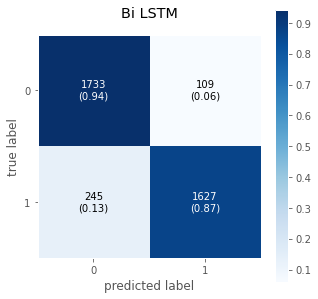

In [71]:
# confusion matrix plot
CR = confusion_matrix(Y_test,y_pred)
# plotting the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=CR, figsize=(5,5), show_absolute=True, show_normed=True, colorbar=True)
plt.title('Bi LSTM')
plt.show()

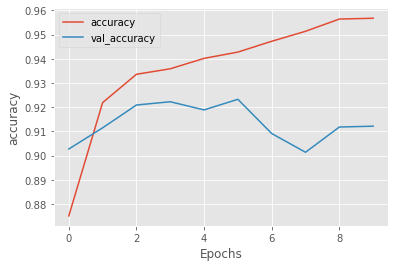

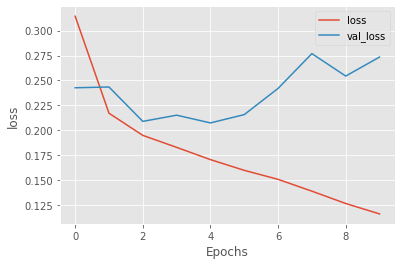

In [72]:
# Epochs vs accuracy graph
#referenced from stack overflow
def plot(model, n):
    plt.plot(model.history[n])
    plt.plot(model.history['val_'+n])
    plt.xlabel("Epochs")
    plt.ylabel(n)
    plt.legend([n, 'val_'+n])
    plt.show()
  
plot(BiLSTM_model, "accuracy")
plot(BiLSTM_model, "loss")

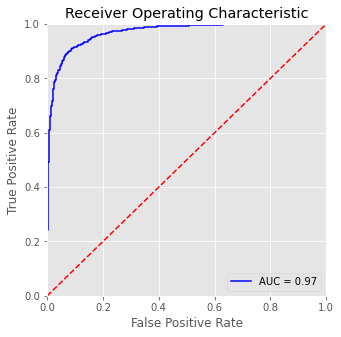

In [73]:
#referenced from stack overflow
from sklearn import metrics
def plot_roc(X_test, Y_test):
    # fpr and tpr values for plotting ROC 
    fpr, tpr, threshold = metrics.roc_curve(Y_test, model.predict_on_batch(X_test))
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure(figsize = (5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
plot_roc(X_test,Y_test)